# Safe Neighborhoods in Pittsburgh

*Notebook* by Owen Aherne

Importing resources and libraries

In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

# The Metric
Graduating college leads to many new oppurtunities in one's life: celebrating your long hard work of schooling, maybe doing more torture in order to get a Master's degree, and even your first 9-5 that you will most likely hate! Another very special opportunity is purchasing/renting a house, which is very likely to be done (for us Pitt students) right here in the city of Pittsburgh. When considering areas in which to look for housing, one of the biggest concerns is **safety**. Knowing your car won't get broken into, or there will not be satatnic rituals happening right outside your window will allow you to rest peacefuly at night. 

# The Dataset
The dataset I chose from the WPRDC website was the City of Pittsburgh Police Incident Blotter, which contains data from Janurary 2016 until the present day, and is updated regularly. This gave good (somewhat recent) data on how "safe" each neighborhood is, by looking at the police incidents in the area (obviously).

# Limitations of the dataset
One limitation of the data set is that it contains data from the past (though it is the pretty recent past). This is a limitation because some of the neighborhoods may have lower crime rates now, than they did in 2016, making the total data irrelevent. 

Importing the dataset:

In [3]:
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")

Converting the given dataframe into a dataframe that totals the number of incidents in each Neighborhood:

In [4]:
crimeByHood = crimes["INCIDENTNEIGHBORHOOD"]
numCrimes = crimeByHood.value_counts().rename_axis('Neighborhood').reset_index(name='Number of Crimes')
numCrimes.head()

,Neighborhood,Number of Crimes
0,South Side Flats,15157
1,Central Business District,13565
2,Carrick,9213
3,Bloomfield,7079
4,Shadyside,6776


Importing the shapefile for geopandas:

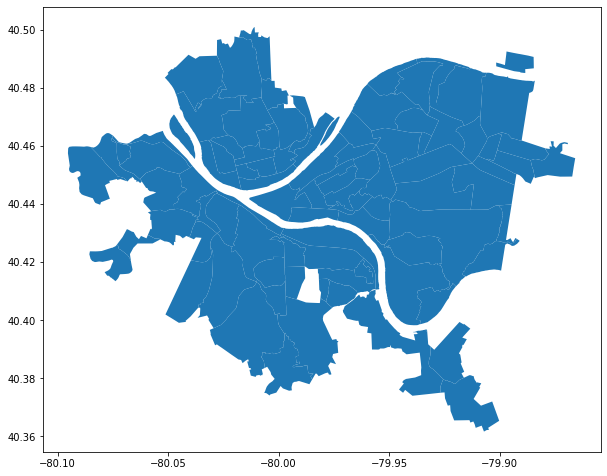

In [5]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")
neighborhoods.plot(figsize = (10,10))
neighborhoods = neighborhoods[["hood", "geometry"]]

Checking the two dataframes to make sure the neighborhood names are the same (so we get accurate data):

In [6]:
numCrimes.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)
for index, row in neighborhoods["hood"].iteritems(): 
    if row in numCrimes['Neighborhood'].tolist():
        pass
    else:
        print(row + " not in crime data set")
    #crime.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)

Plotting the dataframe to see what nonsense we get:

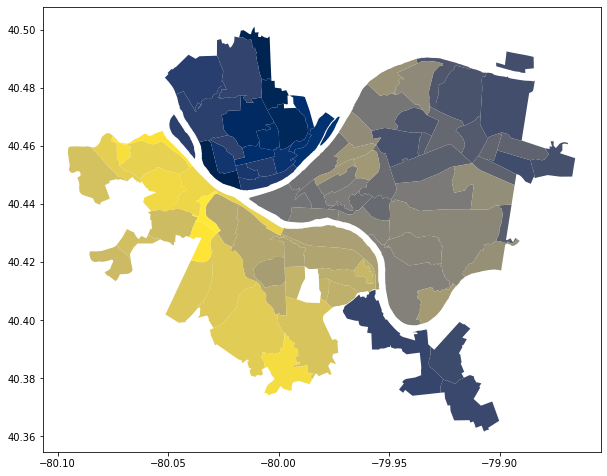

In [7]:
neighborhoods.plot(figsize = (10,10), cmap = "cividis", legend = True)

Adding a row to the dataframe to show the percentages of the the crimes compared to the neighborhood with the most crime (south side flats):

In [8]:
#creating the percentages of the crimes compared to the neighborhood with the most crime (south side flats)
crimeMax = 15157
numCrimes["Percentage of Crimes"] = ""
percent = 0.0
for row in numCrimes.iterrows():
    percent = float(row[1][1])/crimeMax
    numCrimes['Percentage of Crimes'][row[0]] = percent
numCrimes.sort_values(by='Percentage of Crimes', ascending = True)
numCrimes.tail(20)
#these are the "best" 20 neighborhoods with the least number of crimes

<ipython-input-8-0780510b23b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numCrimes['Percentage of Crimes'][row[0]] = percent


,Neighborhood,Number of Crimes,Percentage of Crimes
78,Fairywood,616,0.0406413
79,St. Clair,600,0.0395857
80,Glen Hazel,585,0.038596
81,Esplen,510,0.0336478
82,Oakwood,492,0.0324602
83,Hays,452,0.0298212
84,Regent Square,443,0.0292274
85,Summer Hill,421,0.0277759
86,Mount Oliver,412,0.0271822
87,Arlington Heights,408,0.0269183


Merging the two dataframes:

In [9]:
neighborhoods = neighborhoods.rename(columns={"hood": "Neighborhood"})
CrimeHoodMerged = neighborhoods.merge(numCrimes)
CrimeHoodMerged

,Neighborhood,geometry,Number of Crimes,Percentage of Crimes
0,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",1995,0.131622
1,Summer Hill,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",421,0.0277759
2,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",2112,0.139342
3,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",1939,0.127928
4,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",3186,0.2102
...,...,...,...,...
85,Overbrook,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",1748,0.115326
86,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",246,0.0162301
87,Esplen,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",510,0.0336478
88,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",260,0.0171538


Plotting the dataframe based on the percentage of crime on a scale from 0 to 1 (dark red is 1 (heavy crime), light red is 0 (light crime)):

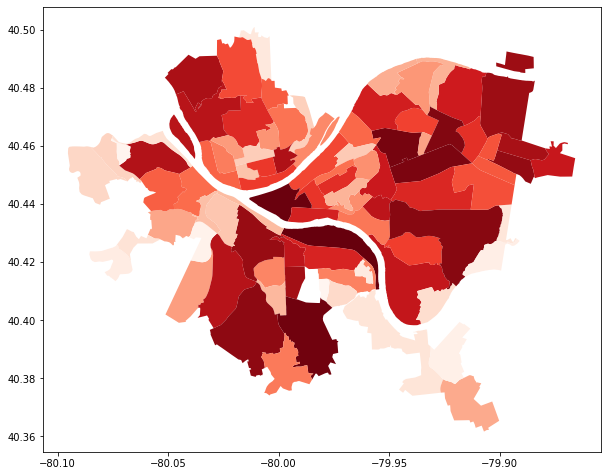

In [17]:
CrimeHoodMerged.plot(column = 'Percentage of Crimes', legend = False, figsize = (10,10), cmap = "Reds")

# So, what is the best neighborhood in Pittsburgh (safety wise)
While there are plenty of neighborhoods that have extremely low crime rates (including Mt Oliver, Arlington Heights, Fairywood, and many more), any neighborhood with rate of below about 30 or 40 percent is relatively safe. Because I compared each neighborhood to South Side, it may seem as though many of the darker colors are not safe, when they really are not that bad. Ideally you would want to have the neighborhood with the absolute safest community, however that cannot always be the case. If your choice depends solely on safety, go ahead and live in Mt. Oliver. As long as you dont pick Southside Flats, then you shouldn't have to worry about cocaine addicts and robberies outside your house.